# Імпорт необхідних бібліотек та модулів

---
*  [pandas](https://uk.wikipedia.org/wiki/Pandas)— програмна бібліотека написана для мови програмування Python для маніпулювання даними та їхнього аналізу
*   Пункт списку





# Підключення до Google drive

In [ ]:
import pandas as pd 
from matplotlib import pyplot
from google.colab import drive


# 0. Зчитування даних
*df - dataFrame*



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/A17.txt", header=None)
df.columns = [str(i+1)  for i in range(12)] #створюэмо назви стовпчиків
df["time"] = [i*0.002 for i in range(1,5001)] #додаємо стовпчик з часом запису: Δt=1/500=0.002


In [ ]:
df 

,1,2,3,4,5,6,7,8,9,10,11,12,time
0,-15.4530,72.701,97.344,-25.117,-56.271,83.041,-2.8759,-16.4570,50.850,75.349,86.702,109.87,0.002
1,-10.7170,69.366,89.259,-26.006,-50.347,78.092,-3.2767,-9.8814,43.641,71.712,85.342,108.56,0.004
2,-7.4065,66.648,83.215,-26.505,-46.115,74.378,-3.4357,-3.4658,36.459,67.685,84.018,107.18,0.006
3,-6.4903,64.747,80.382,-26.250,-44.587,72.508,-3.3036,2.1861,29.414,63.034,82.464,105.42,0.008
4,-8.6653,63.328,81.123,-24.748,-46.235,72.459,-2.8984,6.3580,23.000,58.012,80.301,103.04,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,787.9800,1594.800,802.090,-1189.700,-8.742,1199.300,-1547.3000,-1655.5000,-399.080,1320.900,2252.300,2278.50,9.992
4996,697.2500,1548.300,846.210,-1121.400,-75.959,1198.300,-1537.7000,-1640.0000,-444.120,1168.300,2078.100,2146.20,9.994
4997,585.7500,1446.100,855.400,-1015.200,-136.060,1152.200,-1441.9000,-1547.0000,-449.790,989.340,1833.600,1932.30,9.996
4998,458.8800,1295.300,831.340,-877.070,-187.190,1065.200,-1279.6000,-1392.8000,-423.250,792.930,1536.700,1654.30,9.998


# 1. Основні статистичні параметри 


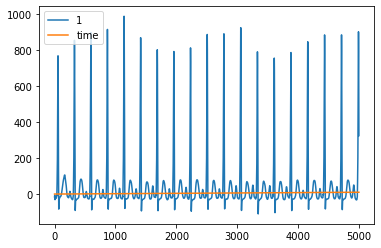

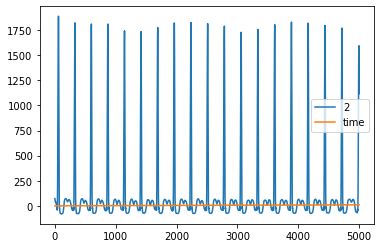

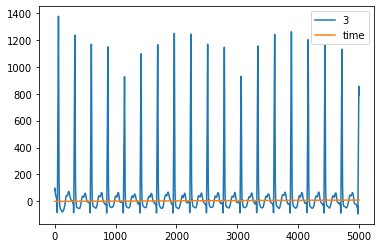

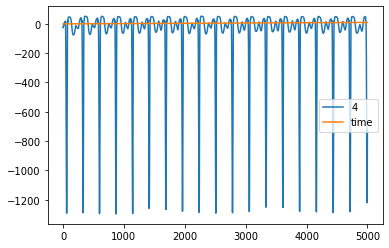

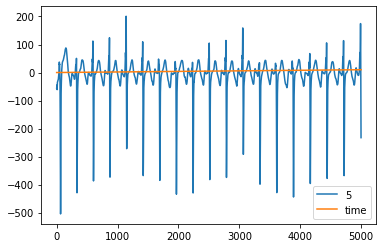

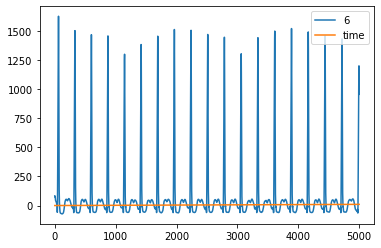

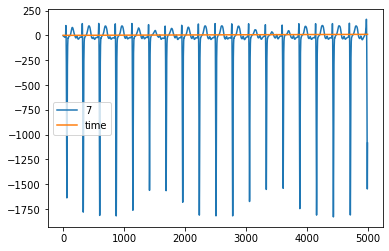

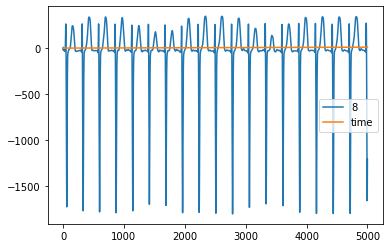

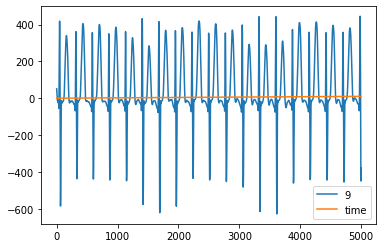

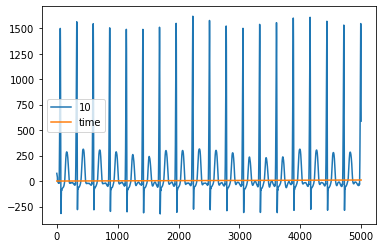

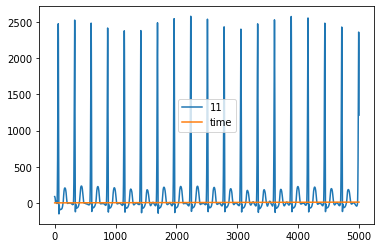

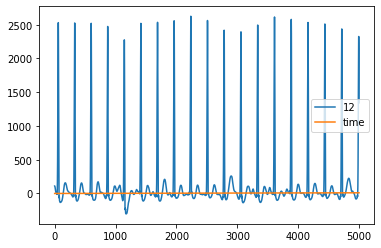

In [ ]:
from matplotlib import pyplot
for i in range(1,13):
  col = str(i) 
  df.loc[:,[col,"time"]].plot()

**DataFrame.count**
Count number of non-NA/null observations.

**DataFrame.max**
Maximum of the values in the object.

**DataFrame.min**
Minimum of the values in the object.

**DataFrame.mean**
Mean of the values.

**DataFrame.std**
Standard deviation of the observations.

**25% 50% 75%** - [квантилі](https://uk.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C)

In [ ]:
df.iloc[:, 0:12].describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.252447,97.837324,58.935230,-69.078679,-11.399638,78.357537,-71.683377,-43.460201,44.838944,101.806621,137.191616,124.449354
std,160.587655,352.760681,215.120914,251.999618,69.049889,280.849931,298.799878,349.210196,176.435002,309.519423,461.829317,466.325378
min,-110.160000,-80.427000,-92.921000,-1297.300000,-504.720000,-72.005000,-1828.900000,-1798.900000,-628.520000,-322.780000,-153.100000,-303.000000
25%,-24.191250,-44.727500,-32.809500,-41.254750,-19.544750,-34.884250,-27.992250,-30.914000,-25.492250,-39.407750,-32.199250,-42.890500
50%,-10.527000,20.818500,-1.389950,-3.446700,-1.782550,14.625500,-13.143500,-23.181500,-11.661500,-18.157000,-8.169350,-0.114102
75%,43.788500,54.822250,40.954500,32.317000,15.861000,46.314500,20.177500,87.107500,138.997500,151.527500,110.807500,76.410750
max,985.880000,1888.600000,1375.100000,52.118000,200.900000,1625.100000,162.310000,345.670000,445.060000,1617.700000,2581.600000,2625.600000


Ділимо на n інтервалів за правилом [Стьорджеса](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D0%A1%D1%82%D1%91%D1%80%D0%B4%D0%B6%D0%B5%D1%81%D0%B0)

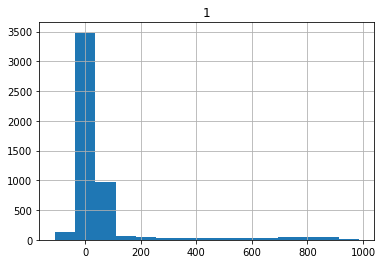

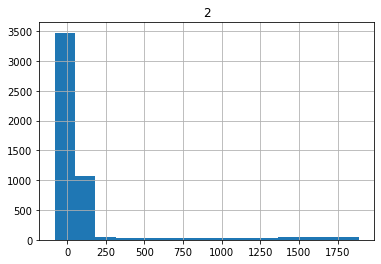

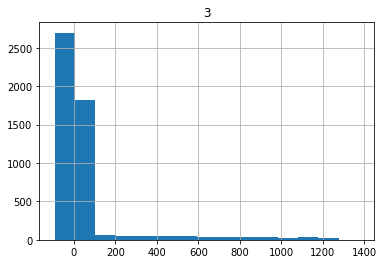

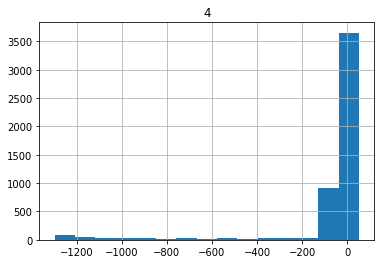

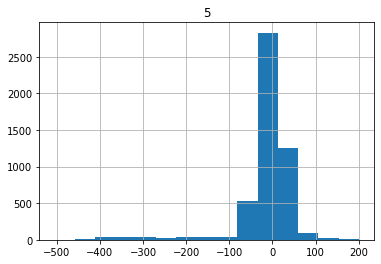

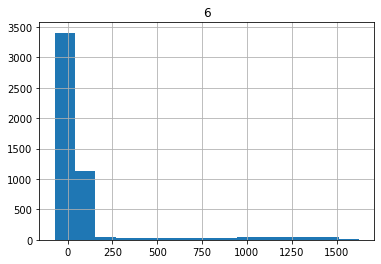

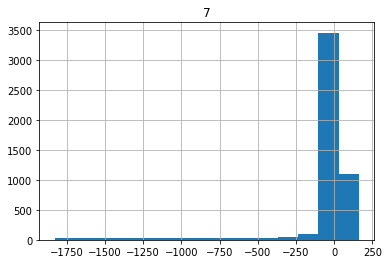

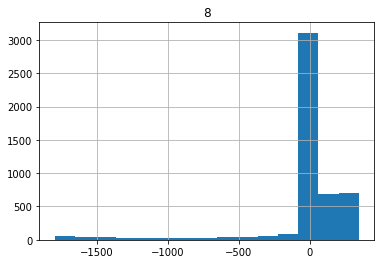

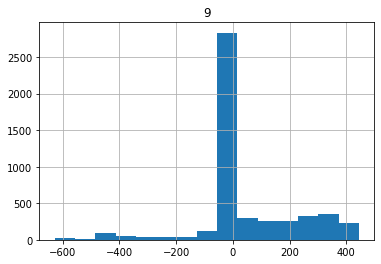

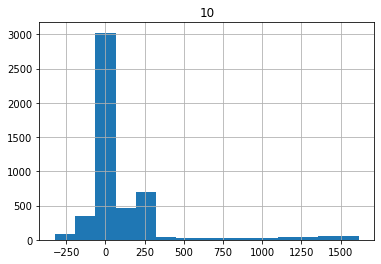

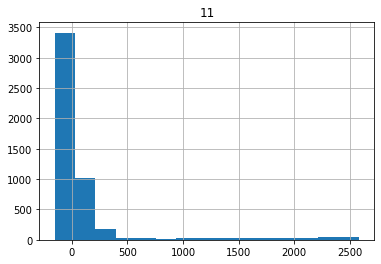

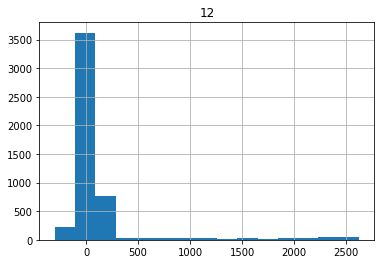

In [ ]:
for i in range(1,13):
  col = str(i) 
  df.loc[:,[col]].hist(bins=15)

Перевіряємо гіпотезу про нормальний закон розподілу

---
Критерій [Шапіро-Уілка](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0)
Якщо p-value < 0.05, то 0-гіпотезу про нормальність відхиляємо.


In [ ]:
import scipy.stats 
for i in range(1,13):
  col = str(i)
  stat, p = scipy.stats.shapiro(df[col])
  print("Phase:", col, ", Statistics=%.3f, p-value=%.5f" % (stat, p))


Phase: 1 , Statistics=0.478, p-value=0.00000
Phase: 2 , Statistics=0.433, p-value=0.00000
Phase: 3 , Statistics=0.473, p-value=0.00000
Phase: 4 , Statistics=0.428, p-value=0.00000
Phase: 5 , Statistics=0.622, p-value=0.00000
Phase: 6 , Statistics=0.443, p-value=0.00000
Phase: 7 , Statistics=0.395, p-value=0.00000
Phase: 8 , Statistics=0.574, p-value=0.00000
Phase: 9 , Statistics=0.854, p-value=0.00000
Phase: 10 , Statistics=0.589, p-value=0.00000
Phase: 11 , Statistics=0.430, p-value=0.00000
Phase: 12 , Statistics=0.436, p-value=0.00000


In [ ]:
from sklearn import preprocessing
times = df["time"]
x = df.iloc[:, :12].values #returns a numpy array
x_scaled = preprocessing.scale(x) #нормалізуємо дані(дисперсія = 1, матсподівання = 0)
df = pd.DataFrame(x_scaled)
df["time"] = times

df.iloc[:, 0:12].describe()


,0,1,2,3,4,5,6,7,8,9,10,11
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-3.197442e-17,-1.953993e-17,6.519230e-17,2.282619e-17,2.735590e-17,5.551115e-17,3.819167e-18,-5.497824e-17,-1.447731e-17,-4.729550e-17,3.623768e-17,-2.398082e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-9.554146e-01,-5.053912e-01,-7.059817e-01,-4.874389e+00,-7.145119e+00,-5.354375e-01,-5.881503e+00,-5.027389e+00,-3.816852e+00,-1.371898e+00,-6.286319e-01,-9.167249e-01
25%,-4.200226e-01,-4.041808e-01,-4.265225e-01,1.104236e-01,-1.179716e-01,-4.032513e-01,1.462367e-01,3.593095e-02,-3.986637e-01,-4.562831e-01,-3.668191e-01,-3.588837e-01
50%,-3.349250e-01,-2.183535e-01,-2.804526e-01,2.604708e-01,1.392913e-01,-2.269483e-01,1.959363e-01,5.807599e-02,-3.202658e-01,-3.876190e-01,-3.147819e-01,-2.671438e-01
75%,3.338404e-03,-1.219506e-01,-8.359266e-02,4.024047e-01,3.948358e-01,-1.141045e-01,3.074635e-01,3.739317e-01,5.337261e-01,1.606550e-01,-5.713530e-02,-1.030255e-01
max,5.870450e+00,5.076931e+00,6.118868e+00,4.809880e-01,3.074891e+00,5.507914e+00,7.831890e-01,1.114427e+00,2.268604e+00,4.898061e+00,5.293412e+00,5.364067e+00


# 2. Однофакторний  дисперсійний аналіз.  
Перевірємо чи є результати вимірювання різними рівнями одного фактору.
За формулою знаходимо 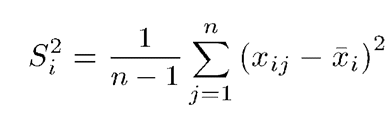 дисперсію для кожного рівня
 


In [ ]:
variance = []

n = 5000
k =12

def sum(values, i):
  sum = 0
  for j in range(n):
      sum += (values[j] - dict(df.mean())[i])**2   
  return sum  

for i in range(k):
  variance.append((1/(n-1))*sum(df.values[:, i], i))

variance



[1.0002000400080011,
 1.0002000400080007,
 1.0002000400080027,
 1.0002000400079993,
 1.0002000400080033,
 1.0002000400080042,
 1.0002000400080013,
 1.0002000400080002,
 1.0002000400080036,
 1.0002000400079996,
 1.0002000400080013,
 1.000200040008005]

За припущенням дисперсійного аналізу - повинна мати місце рівність дисперсій. Перевіряємо рівність дисперсій за критерієм порівняння.
Припускаємо H0: дисперсії рівні. Обчислюємо 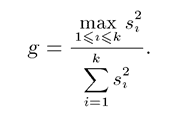. Знаходимо значення статистики g(k, n) при а=0.95. Перевіряємо image.png. Якщо рівність справджується, то гіпотезу H0 відхиляємо.

In [ ]:
g_alpha = 0.153 

def get_g(variance): 
  sum = 0 
  for item in variance:
    sum += item  
  return  max(variance)/sum

g = get_g(variance)
print("Zero hypothesis:") 
g <= g_alpha

Zero hypothesis:


True

При виконанні припущення про рівність дисперсій, знаходимо оцінку дисперсії, що характеризує розсіювання  поза впливом фактора 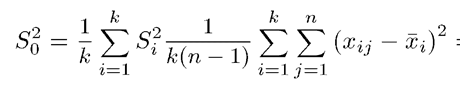



Знаходимо вибіркову дисперсію всіх спостережень

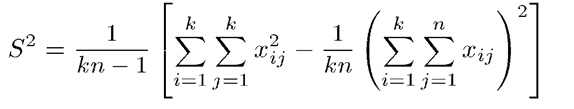

In [ ]:
def get_S0_2(variance): 
  sum_1 = 0 
  for i in range(k):
    sum_1 += variance[i]
  sum_1 /= (k**2)*(n - 1)
  
  sum_2 = 0
  for i in range(k):
    sum_2 += sum(df.values[:, i], i)
  return sum_1 * sum_2
S0_2 = get_S0_2(variance)

S0_2


1.0004001200320085

In [ ]:
def get_S_2(variance):
  sum_1 = sum_2 = 0
  
  for i in range(k):
    for j in range(n):
      sum_1 += df.iloc[j,i]**2
      sum_2 += df.iloc[j,i]
  sum_2 = (sum_2**2) / (k * n)

  return (sum_1 - sum_2)/ (k * n - 1)
S_2 = get_S_2(variance)

S_2

1.00001666694445

Знаходимо оцінку дисперсії, що характеризує зміни параметра, пов'язані з фактором
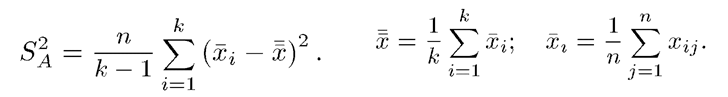

In [ ]:
def mean_x_mean():
  sum = 0
  means_values = dict(df.mean())
  for i in range(k):
    sum += means_values[i]
  return sum / k
mean = mean_x_mean()

def get_SA_2():
  sum = 0
  means_values = dict(df.mean())
  for i in range(k):
    sum += (means_values[i] - mean)**2
  return (n*sum)/(k - 1)
SA_2 = get_SA_2()
SA_2



7.88538450855729e-30

Оцінка  впливу фактора на зміни середнього значення визначається відношенням (вплив значущий з ймовірністю 1-α)

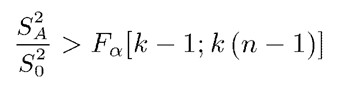

In [ ]:
if((SA_2/ S0_2) > 2.4):
  print("Вплив значущий")
else:
  print("Вплив незначущий")


Вплив незначущий


# 3. Двохфакторний аналіз.



Групуємо і записуємо середнє

In [ ]:
n = 1000
factors = df.reset_index().drop('index', 1).drop('time', 1).groupby(df.index//1000)
factors_means = factors.mean()
factors_means

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.034931,0.025722,0.029479,-0.027022,0.015496,0.028534,-0.015613,0.012635,0.053908,0.041089,0.026590,0.016476
1,-0.002139,0.013891,0.018199,-0.008730,-0.039925,0.014832,-0.021823,-0.096509,-0.128431,-0.036176,-0.004030,-0.010992
2,-0.043246,-0.048971,-0.049627,0.047670,0.029323,-0.049397,0.042797,0.097059,0.100884,-0.009833,-0.035415,-0.024307
3,-0.007809,0.001173,0.006612,0.000661,-0.029325,0.002659,-0.001526,-0.037729,-0.068129,-0.019018,0.002775,-0.003755
4,0.018263,0.008185,-0.004663,-0.012579,0.024431,0.003372,-0.003836,0.024544,0.041768,0.023938,0.010080,0.022578


Розраховуємо Q1, Q2, Q3, Q4

In [ ]:
k = factors_means.columns.size
m = len(factors_means.index)
q1 = factors_means.applymap(lambda x: x ** 2).sum().sum()
q2 = factors_means.sum(axis=0).apply(lambda x: x ** 2).sum() / m
q3 = factors_means.sum(axis=1).apply(lambda x: x ** 2).sum() / k
q4 = factors_means.sum(axis=0).sum() ** 2 / (m * k)
q4_2 = factors_means.sum(axis=1).sum() ** 2 / (m * k)
print(k, m, q1, q2, q3, q4, q4_2)

12 5 0.08849527910767753 7.767960073623641e-32 0.016742892424184076 7.1023682141842834e-34 8.217301096052206e-34


Знаходимо оцінки дисперсій

In [ ]:
s0_2 = (q1 + q4 - q2 - q3) / ((k - 1) * (m - 1))
sA_2 = (q2 - q4) / (k - 1)
sB_2 = (q3 - q4) / (m - 1)
fA_1 = k - 1
fA_2 = (k - 1) * (m - 1)
print(fA_1, fA_2, 'Фактор А', sA_2 / s0_2)
print('Значення для А Значно нижче ніж табличне. А не значуще')
fB_1 = m - 1
fB_2 = fA_2
print(fB_1, fB_2, 'Фактор B', sB_2 / s0_2)
print('Значення для B вище табличного. B значуще')
print('Посилання на таблицю', 'http://socr.ucla.edu/Applets.dir/F_Table.html')

11 44 Фактор А 4.290832262031204e-30
Значення для А Значно нижче ніж табличне. А не значуще
4 44 Фактор B 2.566769206973199
Значення для B вище табличного. B значуще
Посилання на таблицю http://socr.ucla.edu/Applets.dir/F_Table.html


In [ ]:
q5 = factors.apply(lambda df: df.applymap(lambda x: x ** 2)).sum().sum()
sAB_2 = (q5 - 1000 * q1) / ((m * k) * (n - 1))
fAB_1 = (k - 1) * (m - 1)
fAB_2 = m * k * (n - 1)
print(fAB_1, fAB_2, 'Фактор АВ', n * s0_2 / sAB_2, ' не значущий')

44 59940 Фактор АВ 1.6315116762801631  не значущий


# 4. Перетворення Фурʼє




Частота першої синусоїди 1 каналу: 5.5
Частота першої синусоїди 2 каналу: 5.5
Частота першої синусоїди 3 каналу: 5.5
Частота першої синусоїди 4 каналу: 5.5
Частота першої синусоїди 5 каналу: 3.6
Частота першої синусоїди 6 каналу: 5.5
Частота першої синусоїди 7 каналу: 1.8
Частота першої синусоїди 8 каналу: 1.8
Частота першої синусоїди 9 каналу: 1.8
Частота першої синусоїди 10 каналу: 5.5
Частота першої синусоїди 11 каналу: 5.5
Частота першої синусоїди 12 каналу: 5.5


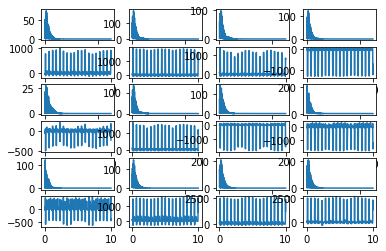

In [ ]:
import math
import csv
import matplotlib.pyplot as plt

def furie():
  data_file_path = '/content/drive/My Drive/Colab Notebooks/A17.txt'
  chnls = 12
  N = 5000
  t = 10
  dscrt = N // t

  d1 = [[0 for i in range(N)] for j in range(chnls)]
  a = [[0 for i in range(N // 2 + 1)] for j in range(chnls)]
  b = [[0 for i in range(N // 2 + 1)] for j in range(chnls)]
  c = [[0 for i in range(N // 2 + 1)] for j in range(chnls)]
  d2 = [[0 for i in range(N)] for j in range(chnls)]
  s = [0 for i in range(chnls)]

  with open(data_file_path) as f:
      rdr = csv.reader(f)
      ri = 0
      for r in rdr:
          for ci in range(chnls):
              d1[ci][ri] = float(r[ci])
          ri += 1

  for ci in range(chnls):
      for di in range(N):
          for si in range(N // 2 + 1):
              a[ci][si] += d1[ci][di] * math.cos(
                  (2 *
                  math.pi /
                  N) *
                  si *
                  di
              )
              b[ci][si] += d1[ci][di] * math.sin(
                  (2 *
                  math.pi /
                  N) *
                  si *
                  di
              )

  for ci in range(chnls):
      for si in range(N // 2 + 1):
          if si != 0 and si != (N // 2):
              a[ci][si] *= (2 / N)
          else:
              a[ci][si] *= (1 / N)
          b[ci][si] *= (2 / N)
          c[ci][si] = math.sqrt(a[ci][si] ** 2 + b[ci][si] ** 2)
          if c[ci][si] > c[ci][s[ci]]:
              s[ci] = si

          for di in range(N):
              d2[ci][di] += a[ci][si] * math.cos(
                  2 *
                  math.pi *
                  si *
                  di /
                  N
              ) + b[ci][si] * math.sin(
                  2 *
                  math.pi *
                  si *
                  di /
                  N
              )

  for ci in range(chnls):
      print('Частота першої синусоїди', ci + 1, 'каналу:', s[ci] * (1 / t))

  width = chnls // 3
  sa = list(map(lambda n: n * (1 / t), range(N // 2 + 1)))
  da = list(map(lambda n: n / dscrt, range(N)))
  for ci in range(chnls):
      plt.subplot(6, width, (ci // width) * width * 2 + ci % width + 1)
      plt.plot(sa, c[ci])
      plt.subplot(6, width, (ci // width) * width * 2 + ci % width + width + 1)
      plt.plot(da, d2[ci])

  plt.show()

furie()

# 5. Кореляційний аналіз


In [ ]:
import numpy as np

def corr(X, Y):
    size = X.shape[0]
    avgX = np.average(X)
    avgY = np.average(Y)
    chiseln = 0
    SumDispX = 0
    SumDispY = 0

    for i in range(size):
        chiseln += (X[i] - avgX)*(Y[i]-avgY)
        SumDispX += (X[i] - avgX)**2
        SumDispY += (Y[i] - avgY) ** 2

    return chiseln/np.sqrt(SumDispX*SumDispY)

In [ ]:
def corr_matrix(data_path):
    data = np.loadtxt(data_path, delimiter=',', skiprows=0)
    len = data.shape[0]
    result = np.zeros([len, len])
    for i in range(len):
        for j in range(len):
            result[i][j] = corr(data[i], data[j])
    return result

result = corr_matrix('/content/drive/My Drive/Colab Notebooks/A17.txt')


In [ ]:
result

# Кластерний аналіз

#k-mean


In [ ]:
!pip install tslearn

In [ ]:
# from tslearn.clustering import TimeSeriesKMeans
# model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5)

# # кожна колонка - це окрема TimeSeries
# clusters = model.fit_predict((df.iloc[:, :12]).transpose() )

Выходные данные были обрезаны до нескольких последних строк (5000).
Point 0 have cluster:  0
Point 1 have cluster:  0
Point 2 have cluster:  0
Point 3 have cluster:  0
Point 4 have cluster:  0
Point 5 have cluster:  0
Point 6 have cluster:  0
Point 7 have cluster:  0
Point 8 have cluster:  0
Point 9 have cluster:  0
Point 10 have cluster:  0
Point 11 have cluster:  0
Point 12 have cluster:  0
Point 13 have cluster:  0
Point 14 have cluster:  0
Point 15 have cluster:  0
Point 16 have cluster:  0
Point 17 have cluster:  0
Point 18 have cluster:  0
Point 19 have cluster:  0
Point 20 have cluster:  0
Point 21 have cluster:  0
Point 22 have cluster:  0
Point 23 have cluster:  0
Point 24 have cluster:  0
Point 25 have cluster:  0
Point 26 have cluster:  0
Point 27 have cluster:  0
Point 28 have cluster:  0
Point 29 have cluster:  0
Point 30 have cluster:  0
Point 31 have cluster:  0
Point 32 have cluster:  0
Point 33 have cluster:  0
Point 34 have cluster:  0
Point 35 have cluster:  0
Point 

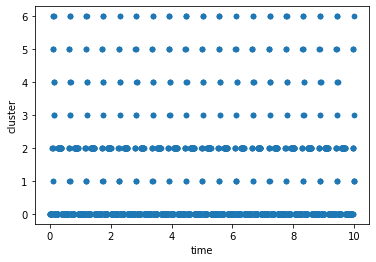

In [ ]:
from sklearn.cluster import KMeans

params = KMeans(n_clusters=7, random_state=0).fit_predict(df.iloc[:,:12])
for i in range(len(params)):
 print("Point", i, "have cluster: ", params[i])

pd.DataFrame({"cluster": params, "time":df["time"]}).plot.scatter(\
                                                                  x='time',
                      y='cluster')

In [ ]:
#@title
